### we want too predict whether the rockets of Space_x will land successfully or not
* if the class is Zero it means it will fail otherwise it will successfully land (class =1)

In [1]:
import os
os.getcwd()

'C:\\Users\\ASUS'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('dataset_falcon9.csv')

In [4]:
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


as previuos command (df) does not provide a good vision. we will use the (.info) method

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

* so as a result we have 90 rows (0 to 89) 
* and 18 columns 
* 90 non-Null  means all of the data are available (no missing values)
* except the column LandingPad that has 64 non_nul. so we have (90-64=26) null values.

In [7]:
# let seethe first 5 rows
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
# or we can see the tail of our data_set
df.tail(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
87,88,2020-10-18,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,0,B1062,-80.577366,28.561857,1


In [9]:
# if we want to see only one column of our data_set:
df['FlightNumber']

0      1
1      2
2      3
3      4
4      5
      ..
85    86
86    87
87    88
88    89
89    90
Name: FlightNumber, Length: 90, dtype: int64

In [13]:
#if a typical row deletion is required (for column deletion --> index=1)
df.drop(2, axis=0)
# as a result we can see the second row does not exist


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [17]:
#df.drop(2, axis=1) -- > this will lead to an error
df.drop('Date', axis=1)

# note that it is a temporary drop
# to make a permanent drop we should use ('Date', axis=1, replace=True)


,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [18]:
#to see the columns names
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [19]:
# another way of visualizing the shape of the data set is the (.shape) attribute.
df.shape

(90, 18)

difference between method and attribute:
* methods are here to do something like (info or drop ) and they have peranteces
* attributes give us a data or information.like (shape or columns ) . they do not use () .

### add a row to a dataFrame
* to add a data frame we need a dictionary. which the keys are the name of the columns and the values are the values

In [52]:
new_row= {'FlightNumber':11, 'Date':2, 'BoosterVersion':3, 'PayloadMass':4, 'Orbit':5,
       'LaunchSite':6, 'Outcome':7, 'Flights':8, 'GridFins':9, 'Reused':10, 'Legs':11,
       'LandingPad':12, 'Block':13, 'ReusedCount':14, 'Serial':15, 'Longitude':16, 'Latitude':17,
       'Class':18}

# df2=pd.apend(new_row , ignore_index=True) # we should replace (append) with ( concat)
df2 = pd.DataFrame(new_row, index=[0])
df2=pd.concat([df ,df2], ignore_index=True)


In [54]:
# to see the results
df2.tail()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
86,87,2020-10-06,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,3,1,1,1,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,6,1,1,1,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,3,1,1,1,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCAFS SLC 40,True ASDS,1,1,0,1,5e9e3032383ecb6bb234e7ca,5.0,0,B1062,-80.577366,28.561857,1
90,11,2,3,4.0,5,6,7,8,9,10,11,12,13.0,14,15,16.000000,17.000000,18


In [55]:
# end of session
# week 4

In [57]:
# looking only at column of BoosterVersion
df['BoosterVersion']

0     Falcon 9
1     Falcon 9
2     Falcon 9
3     Falcon 9
4     Falcon 9
        ...   
85    Falcon 9
86    Falcon 9
87    Falcon 9
88    Falcon 9
89    Falcon 9
Name: BoosterVersion, Length: 90, dtype: object

In [58]:
# but it is not enough. we want to see the diversity of the BoosterVersions.
# so we use (set) to detect the diversity
set(df['BoosterVersion'])

{'Falcon 9'}

In [59]:
# as a result we observe that the (Falcon 9) is the only BoosterVersion exist in the data set!!

In [62]:
# next column is the (PayloadMass). which is the mass the rocket carries with itself.
#so let see the min and the max of the PayloadMass.

min(df['PayloadMass']) # also df['PayloadMass'].min

350.0

In [61]:
max(df['PayloadMass'])

15600.0

In [64]:
#to see the average of the PayloadMass:

df['PayloadMass'].mean()

6104.959411764707

In [65]:
# and to see standardDeviation:

df['PayloadMass'].std()

4694.671719712728

####  why std is a good representative of the data scaterring?
* suppose two number( 5 and 25 ) 
the average is (30/2= 15)

* also for numbers (14 and 16 ) the average is (30/2=15)
but the reality is that the two number (5 ,25 ) are not the same as ( 14 , 16 ) in terms of deviation (scattering).

##### thats why its better to use std instead of average to measure the diversity (scattering) of the numeric data.
* the std for (5 , 25) is 10. 
* the std for (14 ,16) is 1




In [67]:
# the method (describe) will do alot for us. (min , max, std , ...)
# also we know that this method will act on numerical data 

df['PayloadMass'].describe()

count       90.000000
mean      6104.959412
std       4694.671720
min        350.000000
25%       2510.750000
50%       4701.500000
75%       8912.750000
max      15600.000000
Name: PayloadMass, dtype: float64

<Axes: >

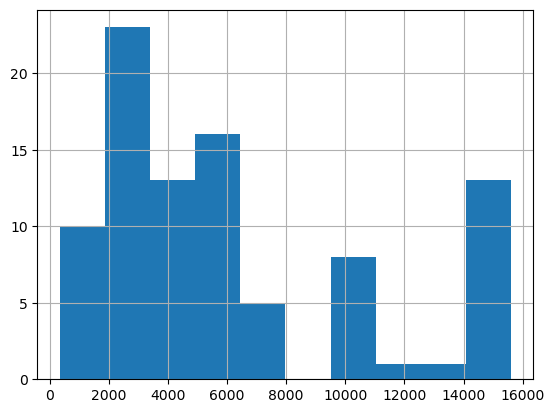

In [69]:
# to see the histogram of the payloadMass:
df['PayloadMass'].hist()

<Axes: >

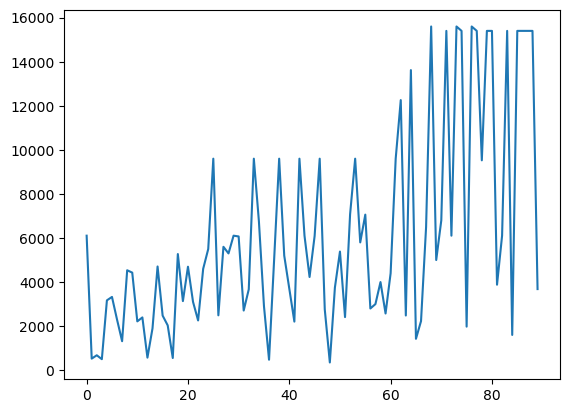

In [70]:
# or simply plot the the whole data
df['PayloadMass'].plot()

In [76]:
#next column is (Orbit)

# to find the unique values using (set) method

set(df['Orbit'])

{'ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO', 'VLEO'}

In [77]:
# to find the unique values using (Unique) method
df['Orbit'].unique()

array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       'SO', 'GEO'], dtype=object)

In [79]:
# count the values in each category using (.value_counts) method

df['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

<Axes: >

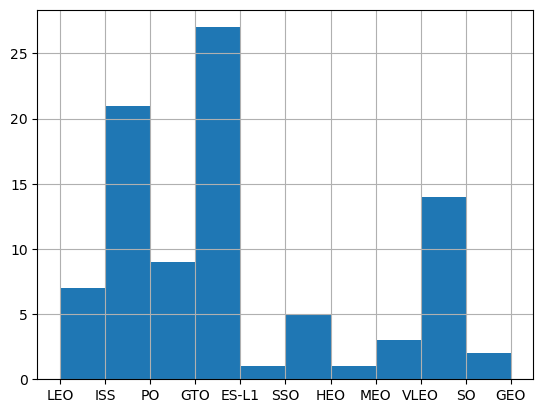

In [80]:
# visualize using hist method:

df['Orbit'].hist()

#### now lets make a dataFrame of successfull lands (class =1) 

In [85]:
# we define the Success_df as the dataFrame in which values of the column class equals to 1.
# at the other hand the Fail_df is the  DataFrame in which the values of the column class is 0.

Success_df=df[df['Class']==1]
Fail_df=df[df['Class']==0]

In [86]:
# lets check the new dataFrames with (info) method
Success_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 6 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    60 non-null     int64  
 1   Date            60 non-null     object 
 2   BoosterVersion  60 non-null     object 
 3   PayloadMass     60 non-null     float64
 4   Orbit           60 non-null     object 
 5   LaunchSite      60 non-null     object 
 6   Outcome         60 non-null     object 
 7   Flights         60 non-null     int64  
 8   GridFins        60 non-null     bool   
 9   Reused          60 non-null     bool   
 10  Legs            60 non-null     bool   
 11  LandingPad      55 non-null     object 
 12  Block           60 non-null     float64
 13  ReusedCount     60 non-null     int64  
 14  Serial          60 non-null     object 
 15  Longitude       60 non-null     float64
 16  Latitude        60 non-null     float64
 17  Class           60 non-null     int64  
dt

In [90]:
Fail_df['Class'].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [91]:
df.columns


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [103]:
len(df.columns)

18

In [98]:
# we can do same for the rest of the columns. 
#but here we take a quick look to the other columns:

print('LaunchSite:',set(df['LaunchSite']))
print('Outcome:',set(df['Outcome']))
print('Flights:',set(df['Flights']))


LaunchSite: {'VAFB SLC 4E', 'CCAFS SLC 40', 'KSC LC 39A'}
Outcome: {'None None', 'False ASDS', 'True ASDS', 'None ASDS', 'True Ocean', 'False Ocean', 'True RTLS', 'False RTLS'}
Flights: {1, 2, 3, 4, 5, 6}


In [105]:
# we can use a loop:
for i in range (len(df.columns)):
    
    print(df.columns[i] ,":")
    print(set(df[df.columns[i]]))
    print('---------')

    

FlightNumber :
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}
---------
Date :
{'2017-01-14', '2014-04-18', '2013-09-29', '2017-10-11', '2017-05-01', '2020-09-03', '2020-06-30', '2018-07-25', '2016-09-01', '2014-07-14', '2020-07-20', '2014-01-06', '2020-06-04', '2015-04-27', '2020-01-19', '2020-02-17', '2016-01-17', '2013-03-01', '2017-12-15', '2018-04-02', '2018-03-06', '2017-06-03', '2016-07-18', '2018-03-30', '2016-08-14', '2018-12-23', '2019-07-25', '2019-12-05', '2019-06-12', '2017-03-16', '2019-01-11', '2017-05-15', '2020-03-07', '2017-03-30', '2015-12-22', '2017-02-19', '2016-04-08', '2019-05-24', '2014-08-05', '2016-05-27', '2015-04-14', '2020-01-29', '2014-09-07', '2018-04-18',

In [107]:
# to focus on the column (Outcome):

df['Outcome'].value_counts()

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [113]:
# let see the same focus on the Success_df and the Fail_df:
print('Success:\n ',Success_df['Outcome'].value_counts())
print('-----------')
print('Fail:\n ',Fail_df['Outcome'].value_counts())

Success:
  Outcome
True ASDS     41
True RTLS     14
True Ocean     5
Name: count, dtype: int64
-----------
Fail:
  Outcome
None None      19
False ASDS      6
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


In [120]:
# focus on  categorical values: (LandingPad) , (Block), (ReusedCount)
print('------------LandingPad:\n' , df['LandingPad'].value_counts())
print('------------Block:\n' , df['Block'].value_counts())
print('------------ReusedCount:\n' , df['ReusedCount'].value_counts())


------------LandingPad:
 LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64
------------Block:
 Block
5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: count, dtype: int64
------------ReusedCount:
 ReusedCount
0    30
1    24
3    12
5    11
2     9
4     4
Name: count, dtype: int64


In [121]:
# focus on  boolean values: (GridFins) , (Reused), (Legs)
print('------------GridFins:\n' , df['GridFins'].value_counts())
print('------------Reused:\n' , df['Reused'].value_counts())
print('------------Legs:\n' , df['Legs'].value_counts())


------------GridFins:
 GridFins
True     70
False    20
Name: count, dtype: int64
------------Reused:
 Reused
False    53
True     37
Name: count, dtype: int64
------------Legs:
 Legs
True     71
False    19
Name: count, dtype: int64


In [122]:
# focus on  boolean values: (Longitude) , (Latitude), (LaunchSite)
print('------------Longitude:\n' , df['Longitude'].value_counts())
print('------------Latitude:\n' , df['Latitude'].value_counts())
print('------------LaunchSite:\n' , df['LaunchSite'].value_counts())

------------Longitude:
 Longitude
-80.577366     55
-80.603956     22
-120.610829    13
Name: count, dtype: int64
------------Latitude:
 Latitude
28.561857    55
28.608058    22
34.632093    13
Name: count, dtype: int64
------------LaunchSite:
 LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


In [126]:
# as the 3 above mentioned columns have the same meaning, we can ommit 2 of them

# in addition, we can also drop the column(Boosterversion) since it has only one value and therefore effectless.
# and also the column (serial) can be dropped:

df=df.drop(['BoosterVersion','Serial','Longitude','Latitude'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   Date          90 non-null     object 
 2   PayloadMass   90 non-null     float64
 3   Orbit         90 non-null     object 
 4   LaunchSite    90 non-null     object 
 5   Outcome       90 non-null     object 
 6   Flights       90 non-null     int64  
 7   GridFins      90 non-null     bool   
 8   Reused        90 non-null     bool   
 9   Legs          90 non-null     bool   
 10  LandingPad    64 non-null     object 
 11  Block         90 non-null     float64
 12  ReusedCount   90 non-null     int64  
 13  Class         90 non-null     int64  
dtypes: bool(3), float64(2), int64(4), object(5)
memory usage: 8.1+ KB


In [127]:
# the number of columns changed from 18 to 14

### Visualization
* MatplotLib and SeaBorn are the two famous library for data Visualization

In [130]:
#first we install the required libraries, if not already installed
!pip install matplotlib
!pip install seaborn

#and for have the result at the same window(only in jupyter notebook):
#%matplotlib inline

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


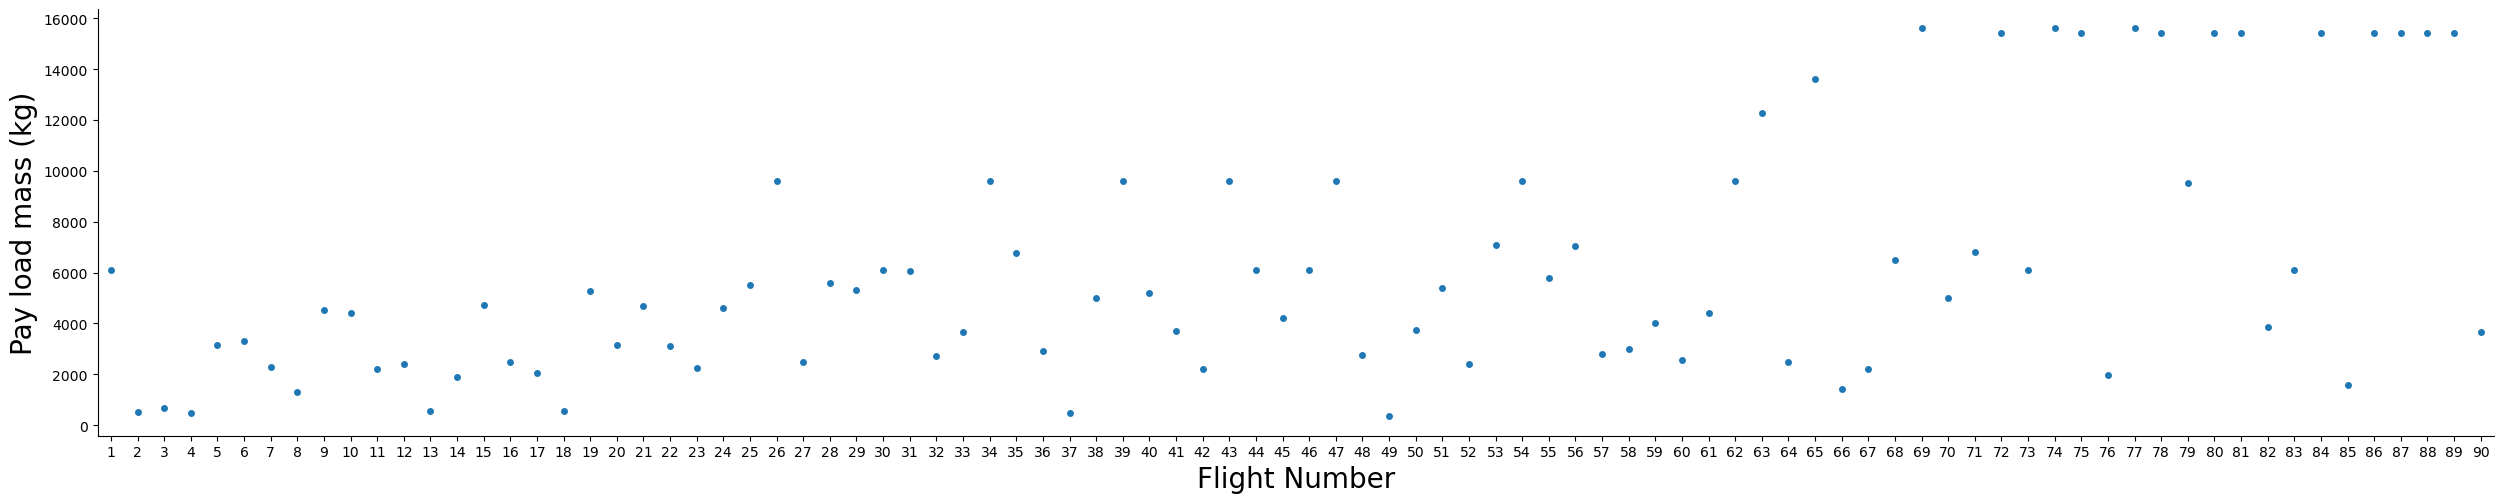

In [139]:
# to visualize the relation between PayloadMass and FlightNumber:

sns.catplot(y="PayloadMass" , x="FlightNumber" , data= df , aspect=5)

#uncomment to see the hue effect:
# sns.catplot(y="PayloadMass" , x="FlightNumber" ,hue="Class", data= df , aspect=5)

plt.xlabel("Flight Number" , fontsize=20)
plt.ylabel("Pay load mass (kg)" , fontsize =20)
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


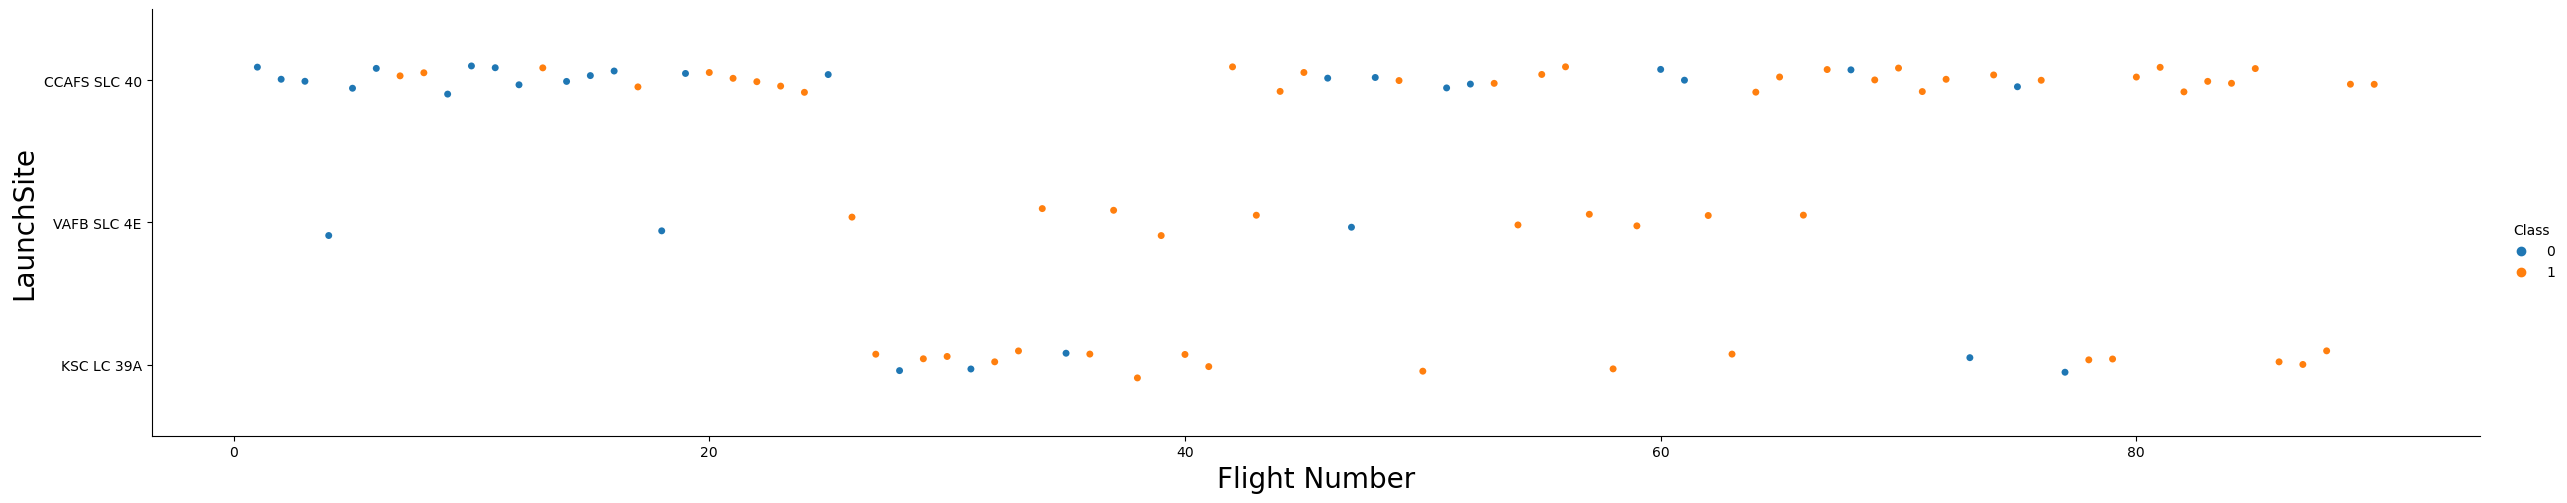

In [140]:
# to visualize the relation between LaunchSite and FlightNumber:


#uncomment to see the hue effect:
sns.catplot(y="LaunchSite" , x="FlightNumber" ,hue="Class", data= df , aspect=5)
# sns.catplot(y="LaunchSite" , x="FlightNumber" , data= df , aspect=5)

plt.xlabel("Flight Number" , fontsize=20)
plt.ylabel("LaunchSite" , fontsize =20)
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


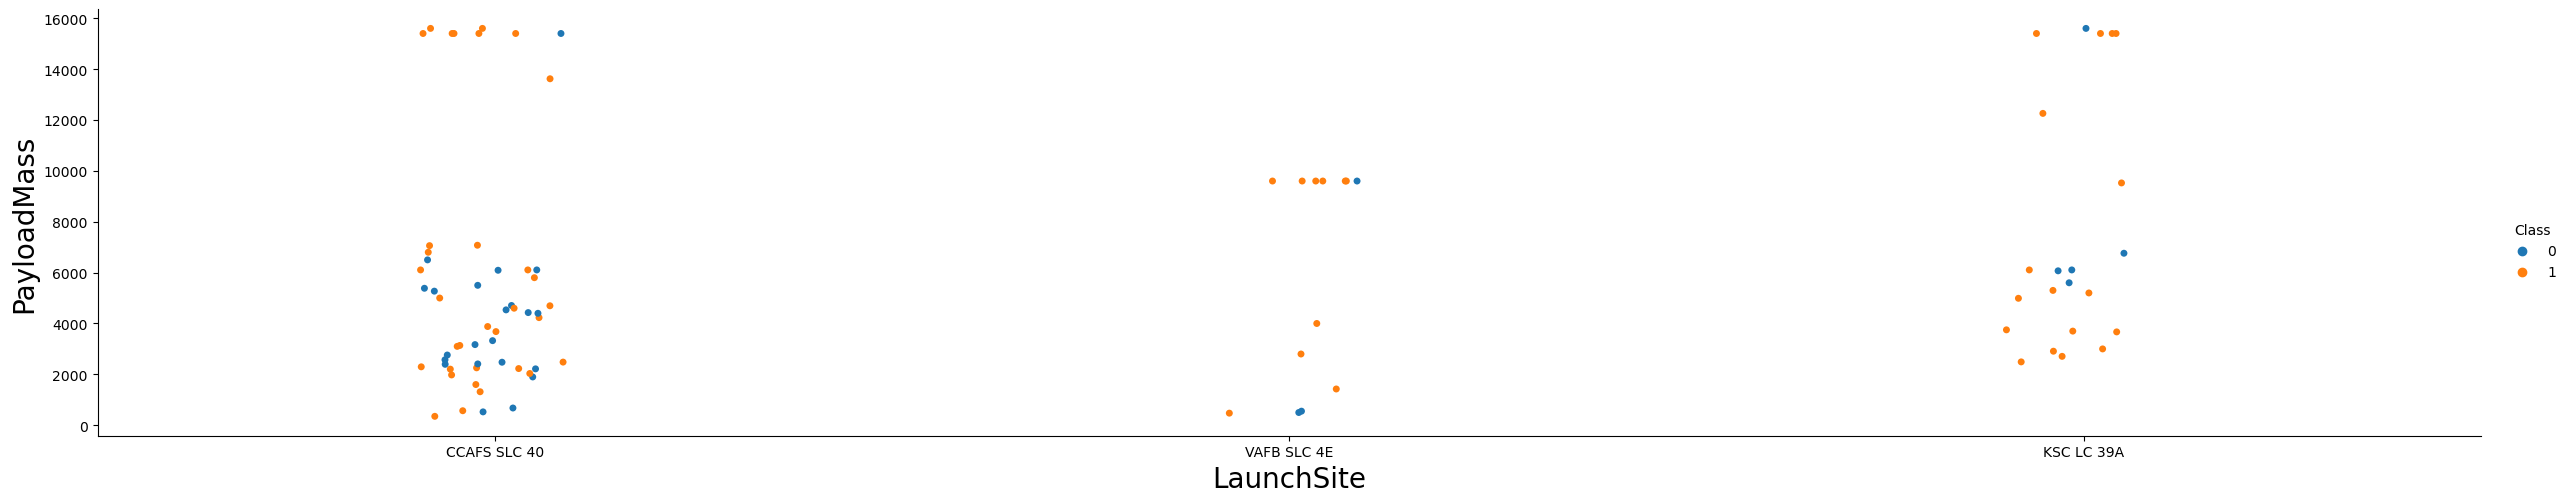

In [142]:
# to visualize the relation between LaunchSite and PayloadMass:


#uncomment to see the hue effect:
sns.catplot(x="LaunchSite" , y="PayloadMass" ,hue="Class", data= df , aspect=5)
# sns.catplot(y="LaunchSite" , x="PayloadMass" , data= df , aspect=5)

plt.xlabel("LaunchSite" , fontsize =20)
plt.ylabel("PayloadMass" , fontsize=20)

plt.show()

In [ ]:
#depend on our goal, we can visualise relation between each desired paires 

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


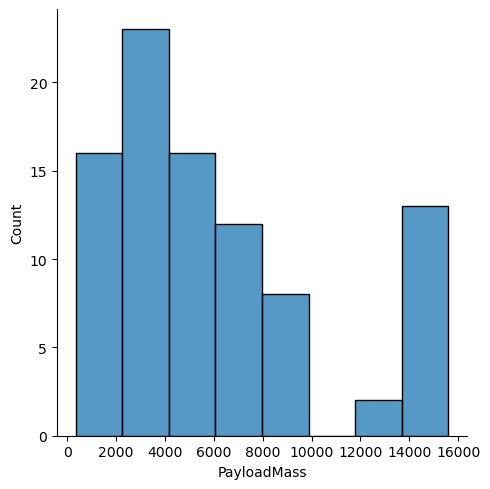

In [143]:
#to visualize the number of flight proportional to Payload (for numerical data)
sns.displot(df['PayloadMass'])

<Axes: xlabel='LaunchSite', ylabel='count'>

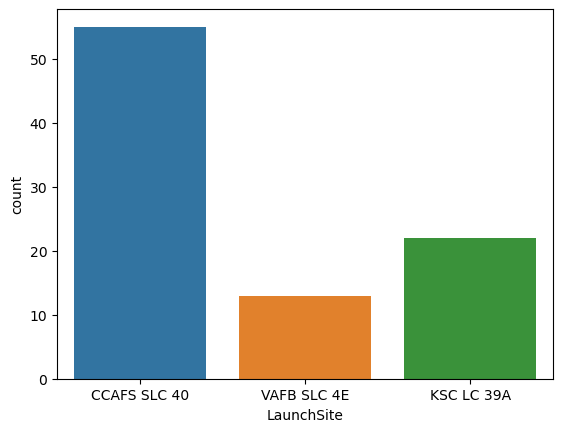

In [145]:
# using (countplot) to have bar chart of the (categorical data)
sns.countplot(x="LaunchSite",data=df)

#### Note
* we use (sns.countplot) for categorical data
* and use (sns.displot) for numerical data

In [114]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')